Transmission of Pulse Code Modulation (PCM) output waveform using Time Division
Multiplexing (TDM) with and without additive noise.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

pi = np.pi

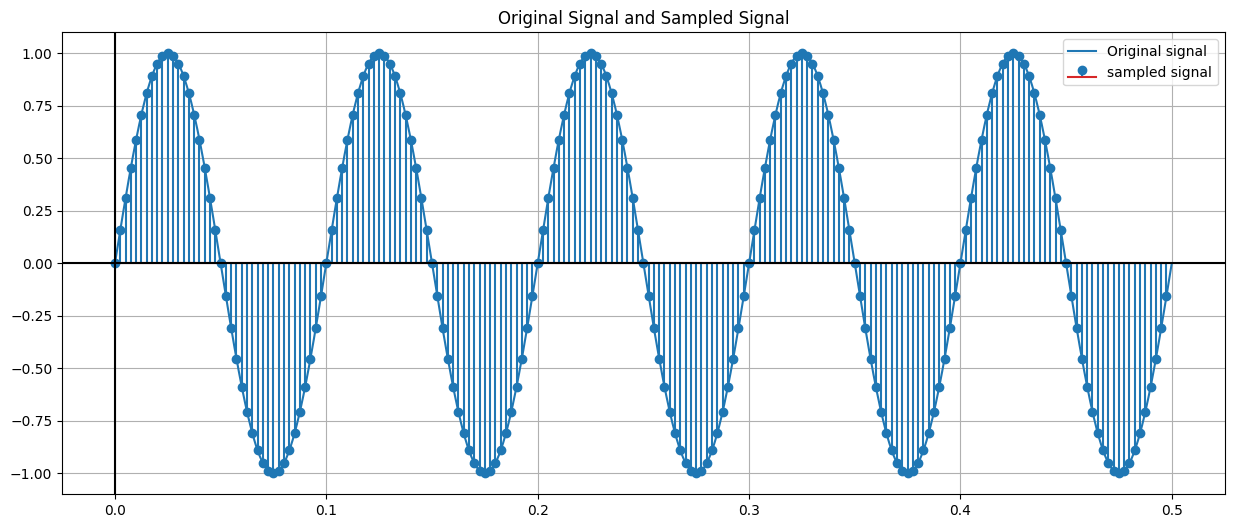

In [46]:
#Sinusoidal Signal

Amp = 1 #Amplitude for the sinusoidal signal
Fm = 10 #Message Frequency
cycles = 5
t_org = np.linspace(0, cycles / Fm, 1000) #plottin points for the original signal
X_org = np.sin(2 * pi * Fm * t_org) #Original Signal
fs = 400 #Sampling frequency
ts = 1 / fs #Sampling period
t = np.arange(0, 4 * cycles * Fm *ts, ts) #plotting points for the sampled signal
X = np.sin(2 * pi * Fm * t)#Sampled Signal

plt.figure(figsize=(15,6))
plt.plot(t_org,X_org) #Plotting of the original signal
plt.stem(t,X) #Plotting of sampling signal
plt.title('Original Signal and Sampled Signal')
plt.legend(['Original signal', 'sampled signal'], loc = 'upper right')
plt.axhline(y = 0, color = 'black')
plt.axvline(x = 0, color = 'black')
plt.grid(True)
plt.show()

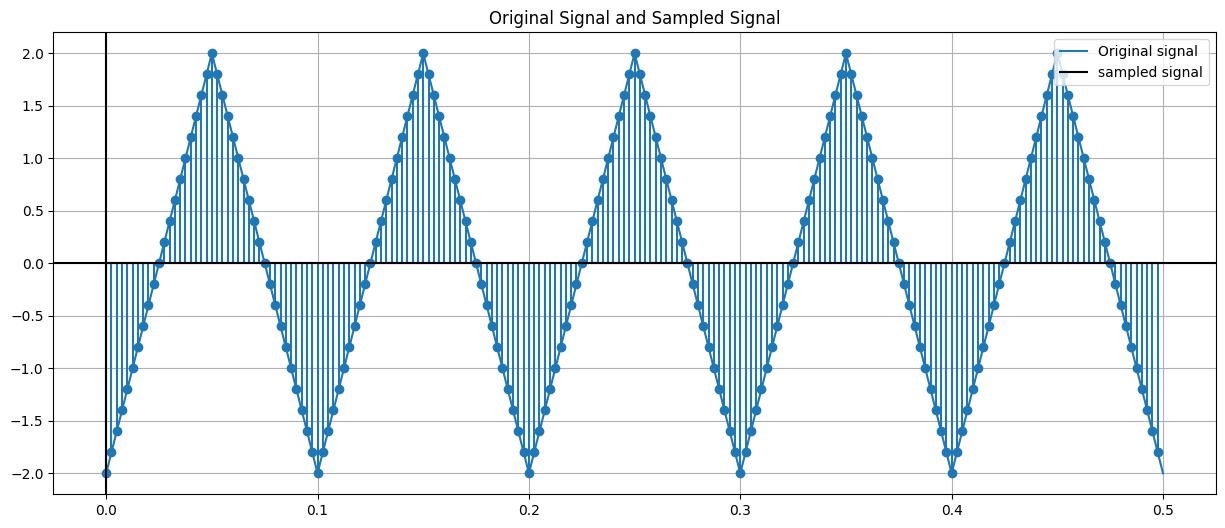

In [47]:
# Triangular signal

Amp2 = 2
Xt_org = Amp2 * signal.sawtooth(2 * pi * Fm * t_org, width=0.5 )
Xt_sam = Amp2 * signal.sawtooth(2 * pi * Fm * t, width= 0.5)
plt.figure(figsize = (15 ,6))
plt.plot(t_org,Xt_org)
plt.stem(t, Xt_sam)
plt.title('Original Signal and Sampled Signal')
plt.axhline( y = 0, color = 'black')
plt.axvline( x = 0, color = 'black')
plt.legend(['Original signal', 'sampled signal'], loc = 'upper right')
plt.grid(True)
plt.show()

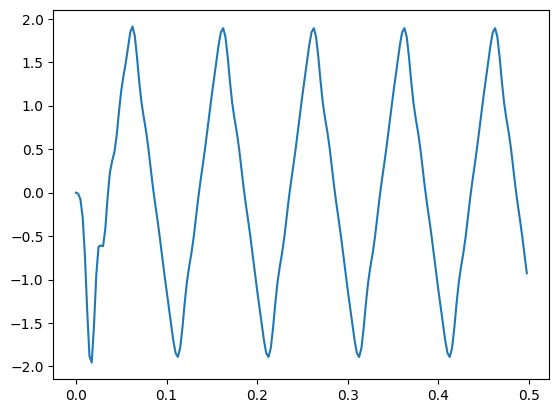

In [48]:
#Designing an Anti-aliasing filter

Fc = fs             # Cutoff frequency of the Anti-aliasing filter
Filter_order = 10   # Order of the filter
fsam = 2000         # Sampling frequency for the filter

NY_freq = 0.5 * fsam
normalized_cutoff_freq = Fc / NY_freq #Normalised Frequency
b, a = signal.butter(Filter_order, normalized_cutoff_freq, btype='low', analog=False)  #Parameters for butter worth filter
filtered_signal = signal.lfilter(b, a, Xt_sam) #Filter Signal
plt.plot(t, filtered_signal)